# Lead Scoring Case Study

In [1]:
# Importing all the essential libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data and Cleaning

In [3]:
Leads = pd.read_csv("Leads.csv")
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
Leads.shape

(9240, 37)

In [5]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Dropping the unnecessary variables
Leads = Leads.drop(["Prospect ID","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","Last Notable Activity"], axis=1)

In [8]:
pd.options.display.max_columns = None
Leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No


In [9]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [10]:
Leads.isnull().sum()/Leads.shape[0]

Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.155628
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [11]:
Leads = Leads.drop(["Tags","Lead Quality","Asymmetrique Activity Score","Asymmetrique Profile Score","Asymmetrique Activity Index","Asymmetrique Profile Index"], axis=1)

In [12]:
Leads.shape

(9240, 26)

In [13]:
100*(Leads.isnull().sum()/Leads.shape[0])

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [14]:
# Removing rows where the values of columns 'city', 'lead profile', 'How did you hear about X Education', 'Specialization' are "Select"
Leads = Leads[-((Leads['City']=="Select")&(Leads['Lead Profile']=="Select")&(Leads['How did you hear about X Education']=="Select")&(Leads['Specialization']=="Select"))]

In [15]:
#Checking the percentage of null values
100*(Leads.isnull().sum()/Leads.shape[0])

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.116520
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.152253
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.152253
Last Activity                                     0.854480
Country                                          21.491455
Specialization                                   18.617297
How did you hear about X Education               28.573278
What is your current occupation                  34.826515
What matters most to you in choosing a course    35.072501
Search                                            0.000000
Magazine                                          0.0000

In [16]:
# Removing rows where the values of columns 'lead profile', 'How did you hear about X Education' are "Select"
Leads = Leads[-((Leads['Lead Profile']=="Select")&(Leads['How did you hear about X Education']=="Select"))]

In [17]:
#Checking the percentage of null values
100*(Leads.isnull().sum()/Leads.shape[0])

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.115531
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.171811
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.171811
Last Activity                                     0.808714
Country                                          25.367222
Specialization                                   23.733289
How did you hear about X Education               36.425153
What is your current occupation                  44.396765
What matters most to you in choosing a course    44.710348
Search                                            0.000000
Magazine                                          0.0000

In [18]:
# Removing the columns where % of null values are greater than 30
Leads = Leads.drop(['How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Lead Profile'], axis=1)

In [19]:
#Checking the percentage of null values
100*(Leads.isnull().sum()/Leads.shape[0])

Lead Number                                0.000000
Lead Origin                                0.000000
Lead Source                                0.115531
Do Not Email                               0.000000
Do Not Call                                0.000000
Converted                                  0.000000
TotalVisits                                1.171811
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.171811
Last Activity                              0.808714
Country                                   25.367222
Specialization                            23.733289
Search                                     0.000000
Magazine                                   0.000000
Newspaper Article                          0.000000
X Education Forums                         0.000000
Newspaper                                  0.000000
Digital Advertisement                      0.000000
Through Recommendations                    0.000000
Receive More

In [20]:
# Filling the missing values and "Select" values with mode of the respective columns
Leads['Lead Source'] = Leads['Lead Source'].fillna("Google")

In [21]:
Leads['TotalVisits'] = Leads['TotalVisits'].fillna(0.0)

In [22]:
Leads['Page Views Per Visit'] = Leads['Page Views Per Visit'].fillna(0.0)

In [23]:
Leads['Last Activity'] = Leads['Last Activity'].fillna('Email Opened')

In [24]:
Leads['Country'] = Leads['Country'].fillna('India')

In [25]:
Leads['Country'] = Leads['Country'].replace('unknown', 'India')

In [26]:
Leads['Specialization'] = Leads['Specialization'].replace("Select","Finance Management")
Leads['Specialization'] = Leads['Specialization'].fillna('Finance Management')

In [27]:
Leads['City'].value_counts()

Mumbai                         2390
Thane & Outskirts               615
Select                          579
Other Cities                    462
Other Cities of Maharashtra     327
Other Metro Cities              221
Tier II Cities                   45
Name: City, dtype: int64

In [28]:
Leads = Leads[-(Leads['City']=="Select")] # Since the number of select values are less compared to the 'Mumbai' values, here they are removed

In [29]:
Leads['City'] = Leads['City'].fillna('Mumbai')

In [30]:
#Checking the percentage of null values
100*(Leads.isnull().sum()/Leads.shape[0])

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
Search                                    0.0
Magazine                                  0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Receive More Updates About Our Courses    0.0
City                                      0.0
A free copy of Mastering The Inter

In [31]:
# Cleaned data frame
Leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,City,A free copy of Mastering The Interview
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,No,No,No,No,No,No,No,No,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,No,No,No,No,No,No,No,No,Mumbai,No
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,No,No,No,No,No,No,No,No,Mumbai,No
5,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,India,Finance Management,No,No,No,No,No,No,No,No,Mumbai,No
6,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,No,No,No,No,No,No,No,No,Mumbai,No


# Inspecting the data frame

In [32]:
Leads.info() # Checking the data type of each column in the data frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5480 entries, 2 to 9239
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             5480 non-null   int64  
 1   Lead Origin                             5480 non-null   object 
 2   Lead Source                             5480 non-null   object 
 3   Do Not Email                            5480 non-null   object 
 4   Do Not Call                             5480 non-null   object 
 5   Converted                               5480 non-null   int64  
 6   TotalVisits                             5480 non-null   float64
 7   Total Time Spent on Website             5480 non-null   int64  
 8   Page Views Per Visit                    5480 non-null   float64
 9   Last Activity                           5480 non-null   object 
 10  Country                                 5480 non-null   obje

In [33]:
Leads.describe(percentiles=[.25, .5, .75, .90, .95, .99]) # Checking for any errors in continuous numeric variables

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,5480.000000,5480.000000,5480.000000,5480.000000,5480.000000
mean,617560.625730,0.360036,3.708394,520.930839,2.533148
std,23532.987371,0.480054,4.425820,548.610837,2.069237
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596784.250000,0.000000,2.000000,51.000000,1.000000
50%,616735.500000,0.000000,3.000000,289.000000,2.000000
75%,637342.000000,1.000000,5.000000,981.500000,4.000000
90%,651262.800000,1.000000,8.000000,1385.100000,5.000000
95%,655379.150000,1.000000,10.000000,1577.000000,6.000000
99%,659585.780000,1.000000,17.000000,1851.210000,9.000000


## Exploratory Data Analysis

In [34]:
# Creating the function for plotting a barplot
def barplot(column,data):
    bar_plot1 = sns.countplot(x=column, data=Leads)
    
    total = len(data[column])
    for p in bar_plot1.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        height = p.get_height()
        plt.xticks(rotation=45)
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 400, percentage,ha='center',va='center')

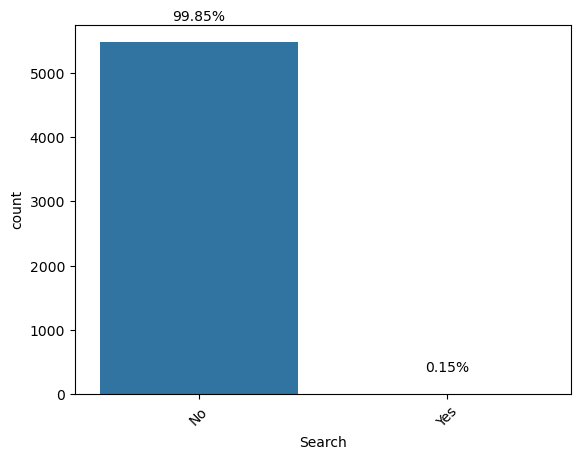

In [35]:
# Bar plot for Search column
barplot('Search',Leads)

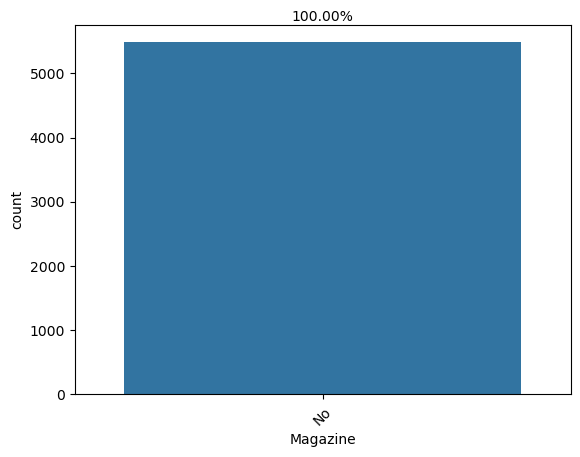

In [36]:
# Bar plot for Magazine column
barplot('Magazine',Leads)

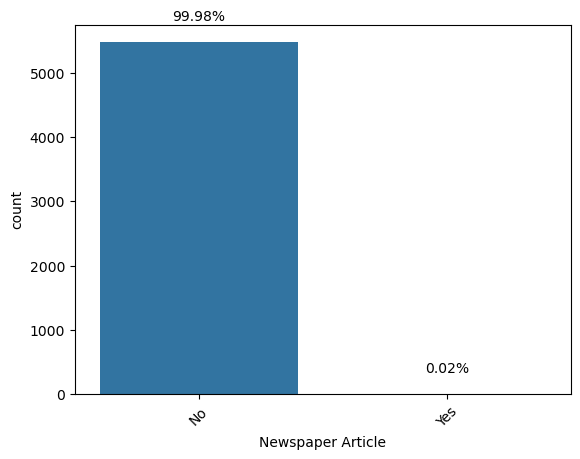

In [37]:
# Bar plot for Newspaper Article column
barplot('Newspaper Article',Leads)

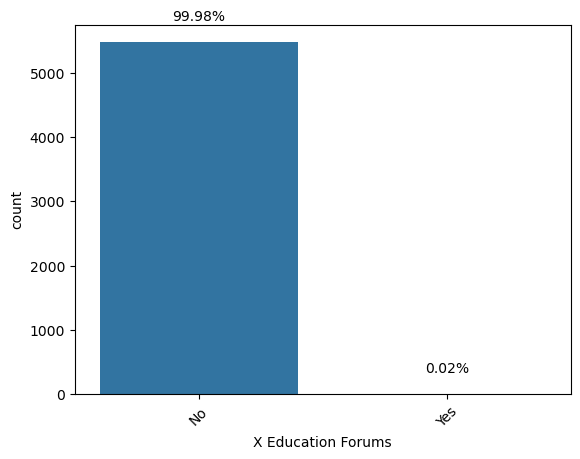

In [38]:
# Bar plot for X Education Forums column
barplot('X Education Forums',Leads)

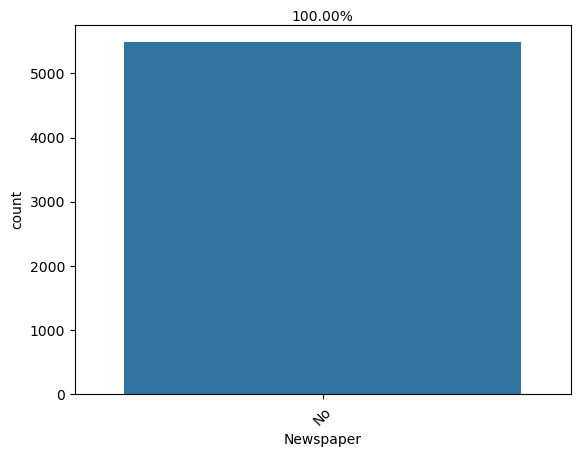

In [39]:
# Bar plot for Newspaper column
barplot('Newspaper',Leads)

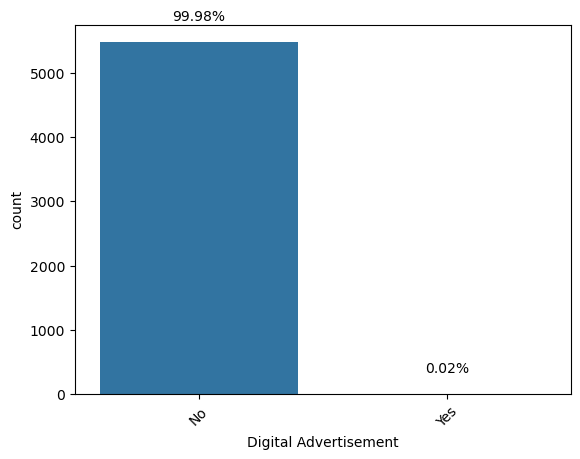

In [40]:
# Bar plot for Digital Advertisement column
barplot('Digital Advertisement',Leads)

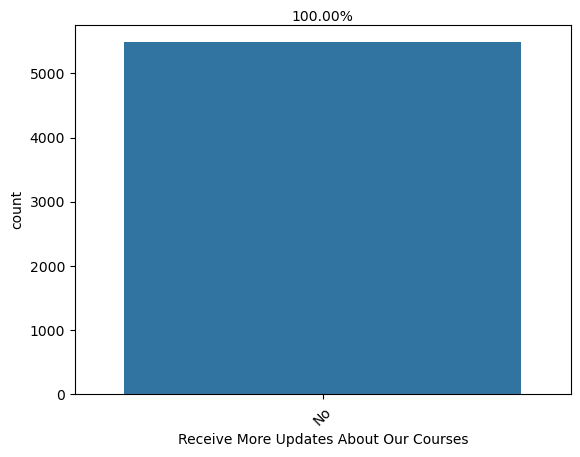

In [41]:
# Bar plot for 'Receive More Updates About Our Courses' column
barplot('Receive More Updates About Our Courses',Leads)

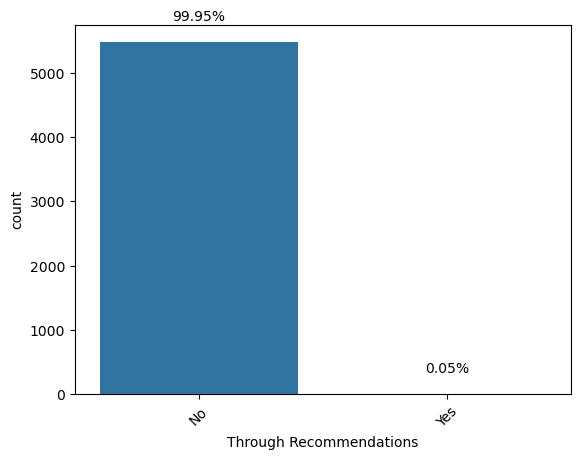

In [42]:
# Bar plot for 'Through Recommendations' column
barplot('Through Recommendations',Leads)

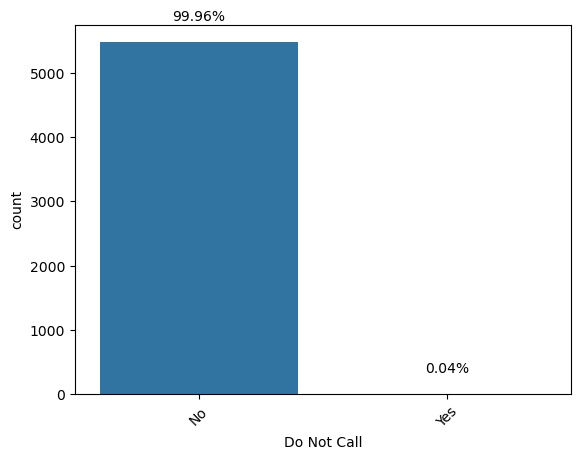

In [43]:
# Bar plot for 'Do Not Call' column
barplot('Do Not Call',Leads)

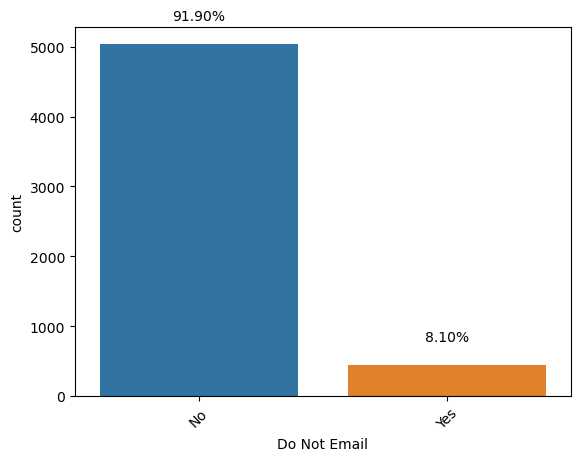

In [44]:
# Bar plot for 'Do Not Email' column
barplot('Do Not Email',Leads)

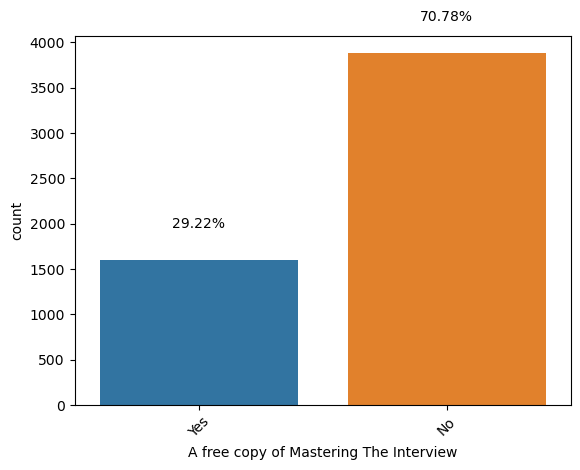

In [45]:
# Bar plot for 'A free copy of Mastering The Interview' column
barplot('A free copy of Mastering The Interview',Leads)

In [46]:
# Percentages of various classes in Lead Source
100*(Leads['Lead Source'].value_counts(normalize=True))

Google               39.416058
Direct Traffic       26.861314
Olark Chat           17.864964
Organic Search        9.890511
Reference             3.777372
Referral Sites        1.259124
Facebook              0.364964
Welingak Website      0.164234
google                0.091241
bing                  0.072993
Click2call            0.072993
Press_Release         0.036496
testone               0.018248
youtubechannel        0.018248
blog                  0.018248
welearnblog_Home      0.018248
WeLearn               0.018248
Pay per Click Ads     0.018248
NC_EDM                0.018248
Name: Lead Source, dtype: float64

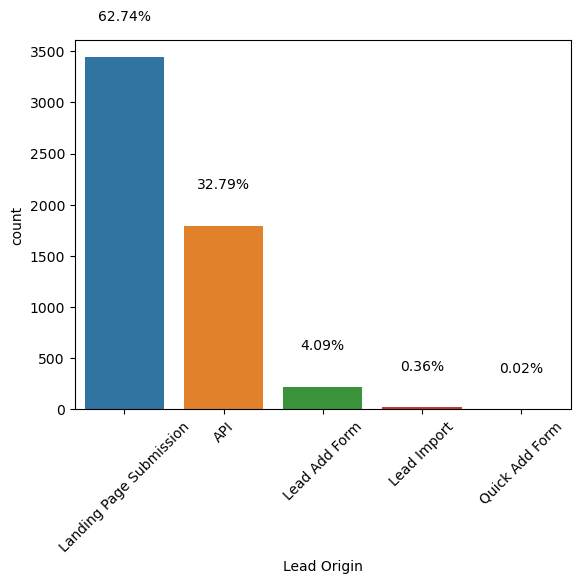

In [47]:
# Bar plot for 'Lead Origin' column
barplot('Lead Origin',Leads)

In [48]:
# Percentages of various Specializations
100*(Leads['Specialization'].value_counts(normalize=True))

Finance Management                   41.058394
Human Resource Management            10.583942
Marketing Management                  9.689781
Operations Management                 5.857664
Business Administration               4.963504
IT Projects Management                4.726277
Banking, Investment And Insurance     4.306569
Supply Chain Management               3.923358
Media and Advertising                 2.390511
Travel and Tourism                    2.299270
International Business                2.262774
Healthcare Management                 1.934307
Hospitality Management                1.496350
E-COMMERCE                            1.386861
Retail Management                     1.295620
Rural and Agribusiness                0.675182
E-Business                            0.675182
Services Excellence                   0.474453
Name: Specialization, dtype: float64

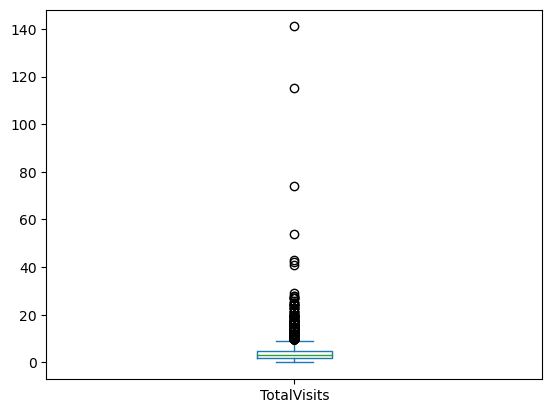

In [49]:
# Box plot for 'TotalVisits' column
Leads['TotalVisits'].plot(kind='box')
plt.show()

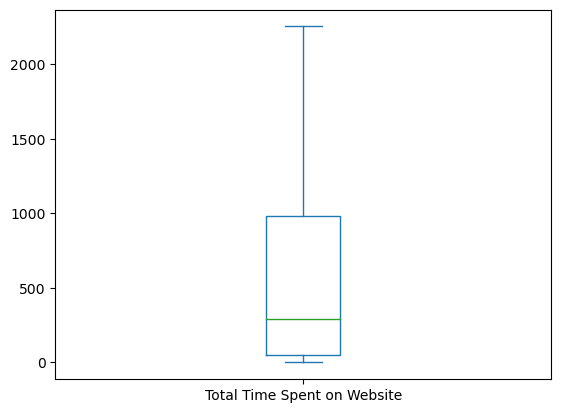

In [50]:
# Box plot for 'Total Time Spent on Website' column
Leads['Total Time Spent on Website'].plot(kind='box')
plt.show()

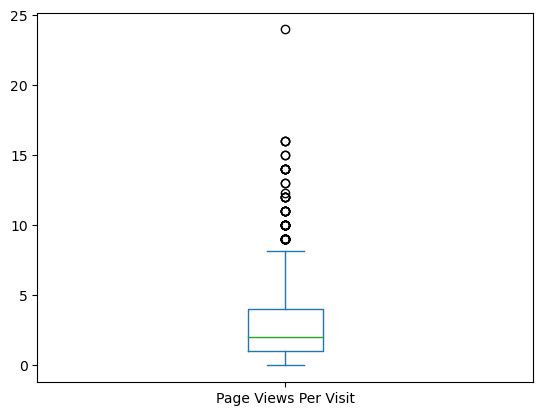

In [51]:
# Box plot for 'Page Views Per Visit' column
Leads['Page Views Per Visit'].plot(kind='box')
plt.show()

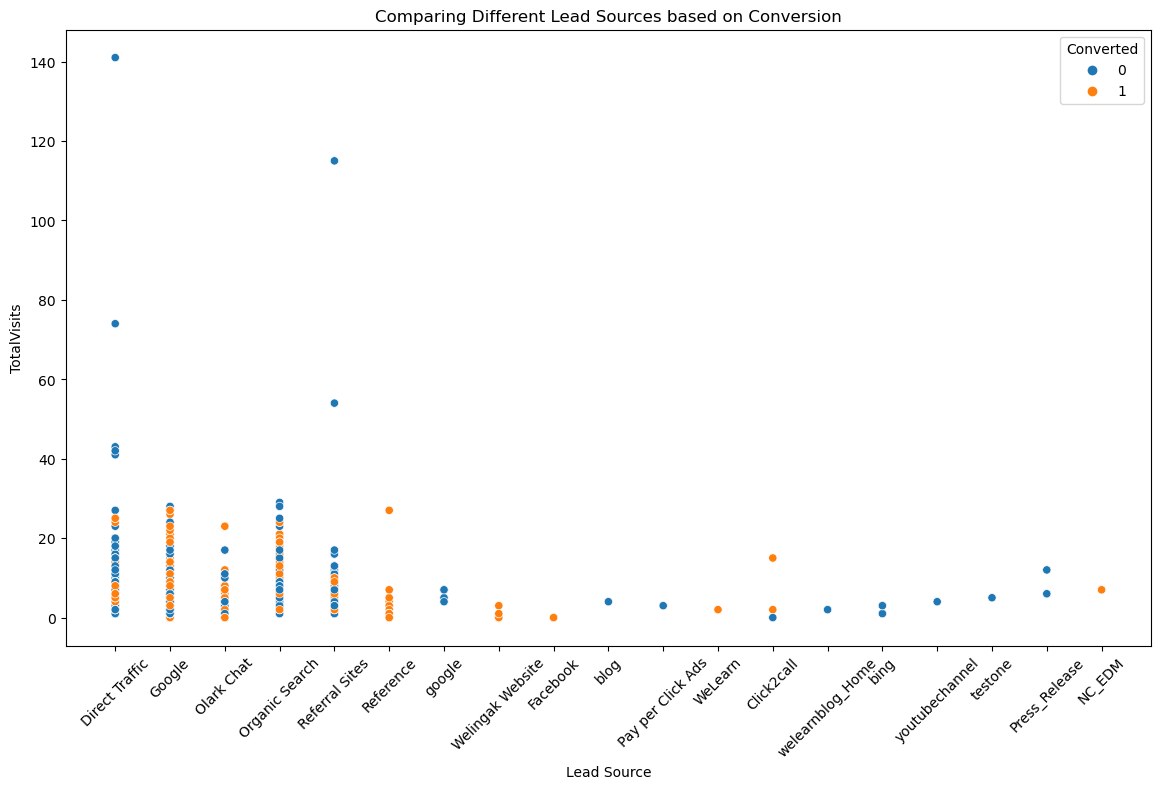

In [52]:
# Plot for Comparing different Lead Sources based on Conversion
plt.figure(figsize=(14,8))
sns.scatterplot(x='Lead Source',y='TotalVisits',hue='Converted',data=Leads)
plt.xticks(rotation=45)
plt.title('Comparing Different Lead Sources based on Conversion')
plt.show()

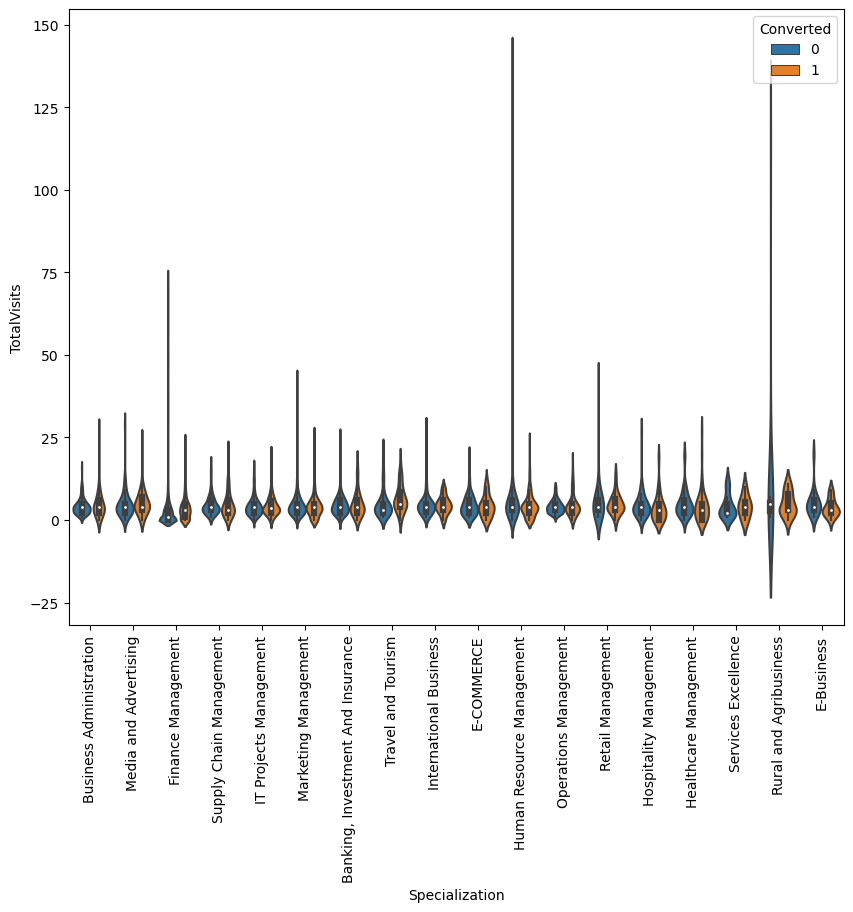

In [53]:
# Plot for Comparing different specializations based on total visits and conversion
plt.figure(figsize=(10,8))
sns.violinplot(x='Specialization',y='TotalVisits',hue='Converted',data=Leads)
plt.xticks(rotation=90)
plt.show()

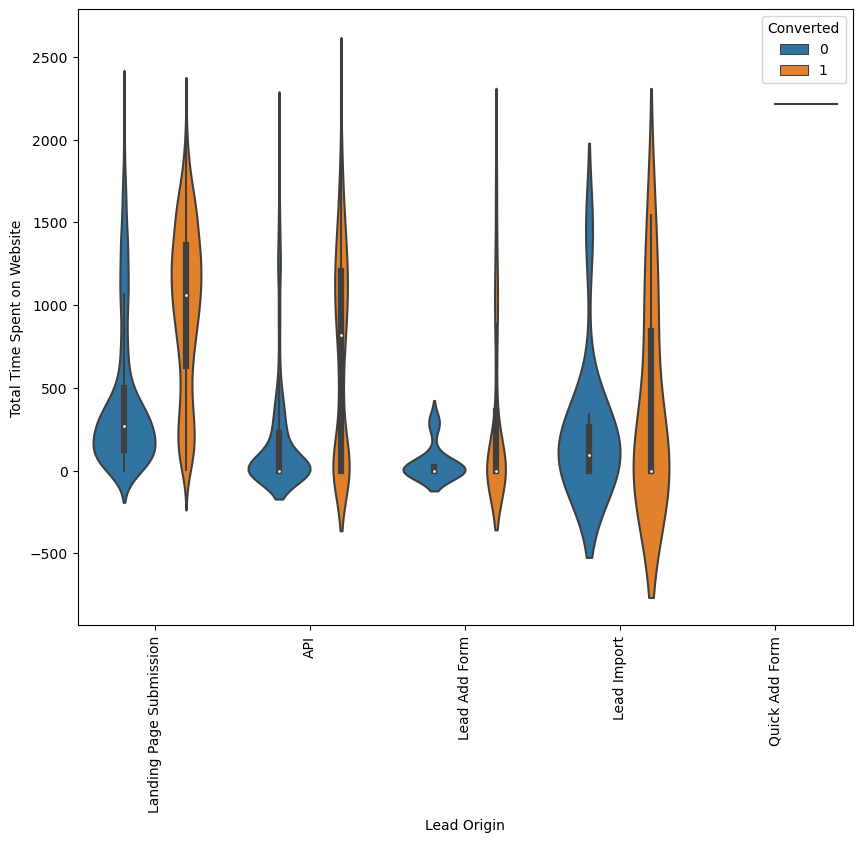

In [54]:
# Plot for Comparing different Lead Origins based on total time spent on website and conversion
plt.figure(figsize=(10,8))
sns.violinplot(x='Lead Origin',y='Total Time Spent on Website',hue='Converted',data=Leads)
plt.xticks(rotation=90)
plt.show()

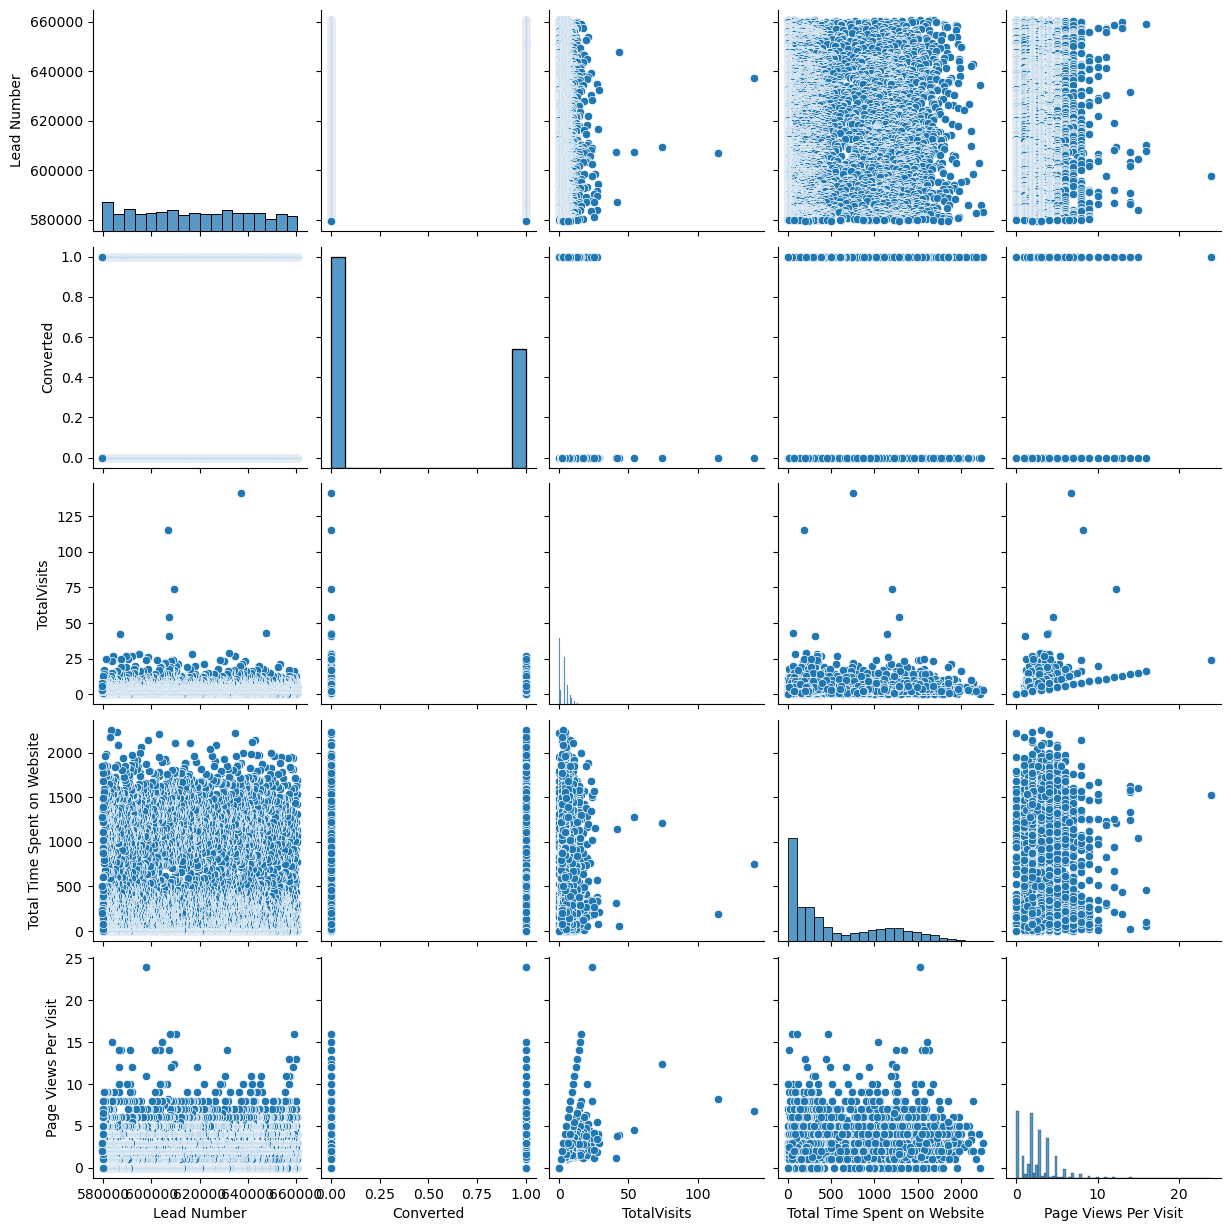

In [55]:
# Plot comparing relation between numeric columns
sns.pairplot(data=Leads)
plt.show()

<Figure size 3000x1000 with 0 Axes>

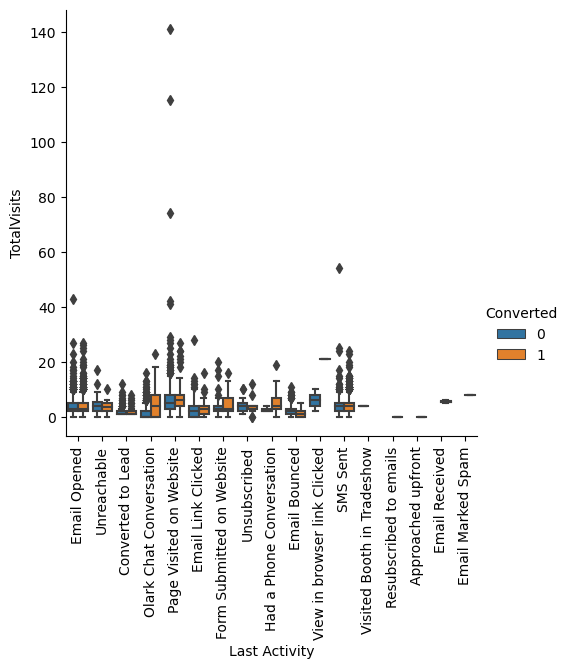

In [56]:
# Plot for Comparing Last activity based on total vists and conversion
plt.figure(figsize=(30,10))
sns.catplot(x='Last Activity',y='TotalVisits',hue='Converted',data=Leads,kind='box')
plt.xticks(rotation=90)
plt.show()

In [57]:
# Table showing Different lead origins and conversion
pd.crosstab(Leads['Lead Origin'],Leads['Converted'])

Converted,0,1
Lead Origin,,
API,1370,427
Landing Page Submission,2112,1326
Lead Add Form,14,210
Lead Import,11,9
Quick Add Form,0,1


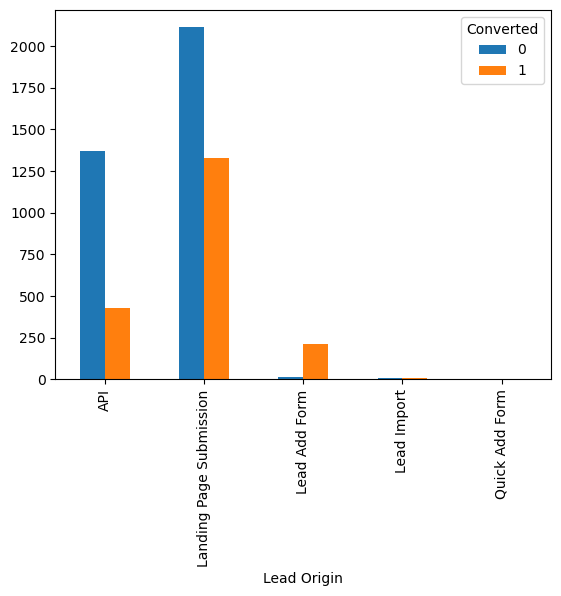

In [58]:
# Bar plot on different Lead Origins and conversions
pd.crosstab(Leads['Lead Origin'],Leads['Converted']).plot(kind='bar')
plt.show()

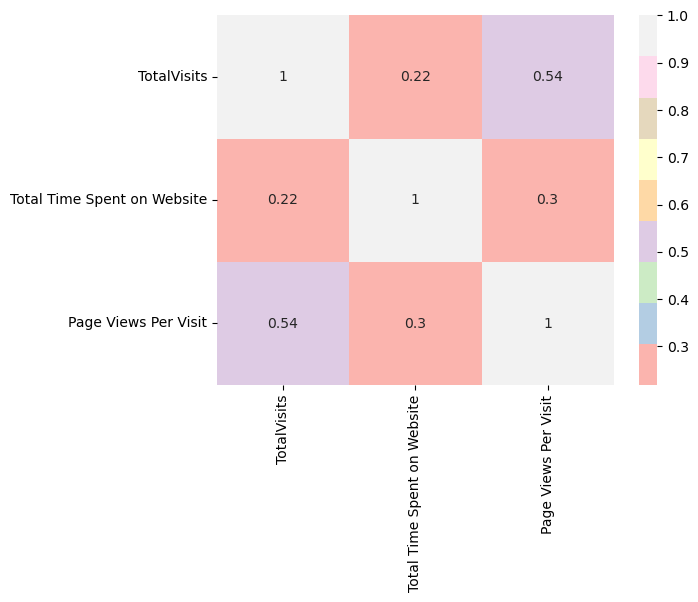

In [59]:
# Heatmap showing the relation between 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'
num_var=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
sns.heatmap(Leads[num_var].corr(),annot=True,cmap='Pastel1')
plt.show()

# Data Preparation

In [60]:
# Converting the "Yes/No" variables to binary numerical

In [61]:
Vars = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','A free copy of Mastering The Interview']

def Binary_Map(x):
    return x.map({"Yes":1,"No":0})

Leads[Vars] = Leads[Vars].apply(Binary_Map)

In [62]:
Leads.head() # Verifying the data frame after converting

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,City,A free copy of Mastering The Interview
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,0,0,0,0,0,0,0,0,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,0,0,0,0,0,0,0,0,Mumbai,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,0,0,0,0,0,0,0,0,Mumbai,0
5,660680,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,India,Finance Management,0,0,0,0,0,0,0,0,Mumbai,0
6,660673,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,0,0,0,0,0,0,0,0,Mumbai,0


In [63]:
# Creating the dummy variables for columns having more than 2 classes
Leads = pd.get_dummies(Leads, columns=['Lead Origin','Lead Source','Last Activity','Country','Specialization','City'], drop_first=True)

In [64]:
Leads.head() # Verifying the data frame creating dummy variables and removing the main columns

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Italy,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sweden,Country_Switzerland,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
2,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,660680,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,660673,0,0,1,2.0,1640,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [65]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5480 entries, 2 to 9239
Columns: 103 entries, Lead Number to City_Tier II Cities
dtypes: float64(2), int64(14), uint8(87)
memory usage: 1.3 MB


In [66]:
Leads.shape # Checking the shape of dataframe

(5480, 103)

# Test-Train Split

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = Leads.drop(['Lead Number','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Italy,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sweden,Country_Switzerland,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,2.0,1640,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [69]:
y = Leads['Converted']
y.head()

2    1
3    0
4    1
5    0
6    1
Name: Converted, dtype: int64

In [70]:
# Splitting the data into train and test data sets

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [74]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Italy,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sweden,Country_Switzerland,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
6748,0,0,-0.143301,-0.405530,0.228661,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7901,0,0,-0.143301,0.220565,0.228661,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6361,0,0,-0.783314,-0.951076,-1.216642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2008,0,0,-0.783314,-0.951076,-1.216642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1312,0,0,-0.783314,-0.951076,-1.216642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
# Checking the conversion rate
100*(y.value_counts()/y.shape[0])

# 36% are being converted

0    63.99635
1    36.00365
Name: Converted, dtype: float64

# Model Building

In [76]:
import statsmodels.api as sm

In [77]:
LogM1 = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
LogM1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3835
Model:                            GLM   Df Residuals:                     3742
Model Family:                Binomial   Df Model:                           92
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 19 Jun 2023   Deviance:                   1.0021e+05
Time:                        16:22:07   Pearson chi2:                 4.90e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                      -9.932e+15    1.1e+08  -9.02e+07      0.000   -9.93e+15   -9.93e+15
Do Not Email                               -2.314e+14   6.01e+06  -3.85e+07      0.000   -2.31e+14   -2.31e+14
Do Not Call                                  1.56e+15   4.78e+07   3.26e+07      0.000    1.56e+15    1.56e+15
TotalVisits                                 5.219e+13   1.35e+06   3.87e+07      0.000    5.22e+13    5.22e+13
Total Time Spent on Website                 5.707e+14   1.23e+06   4.63e+08      0.000    5.71e+14    5.71e+14
Page Views Per Visit                       -1.124e+14    1.6e+06  -7.01e+07      0.000   -1.12e+14   -1.12e+14
Search                                     -1.066e+15   2.56e+07  -4.17e+07      0.000   -1.07e+15   -1.07e+15
Magazine                                     213.8558    2.2e-06   9.74e+07      0.000     213.856     213.856
Newspaper Article                             -0.6997   4.72e-07  -1.48e+06      0.000      -0.700      -0.700
X Education Forums                           497.5329   3.56e-06    1.4e+08      0.000     497.533     497.533
Newspaper                                     -4.4698    5.9e-07  -7.58e+06      0.000      -4.470      -4.470
Digital Advertisement                        -72.9453   1.69e-06  -4.32e+07      0.000     -72.945     -72.945
Through Recommendations                     7.544e+15   4.76e+07   1.58e+08      0.000    7.54e+15    7.54e+15
Receive More Updates About Our Courses        -2.0362   5.14e-07  -3.96e+06      0.000      -2.036      -2.036
A free copy of Mastering The Interview      1.312e+14   3.34e+06   3.93e+07      0.000    1.31e+14    1.31e+14
Lead Origin_Landing Page Submission         2.747e+13   3.81e+06   7.21e+06      0.000    2.75e+13    2.75e+13
Lead Origin_Lead Add Form                   8.157e+15   3.91e+07   2.08e+08      0.000    8.16e+15    8.16e+15
Lead Origin_Lead Import                     4.185e+15   2.89e+07   1.45e+08      0.000    4.18e+15    4.18e+15
Lead Origin_Quick Add Form                  4.984e+15   6.84e+07   7.28e+07      0.000    4.98e+15    4.98e+15
Lead Source_Direct Traffic                  7.687e+15   5.51e+07    1.4e+08      0.000    7.69e+15    7.69e+15
Lead Source_Facebook                        4.185e+15   2.89e+07   1.45e+08      0.000    4.18e+15    4.18e+15
Lead Source_Google                          7.995e+15    5.5e+07   1.45e+08      0.000    7.99e+15    7.99e+15
Lead Source_NC_EDM                          9.099e+15   8.68e+07   1.05e+08      0.000     9.1e+15     9.1e+15
Lead Source_Olark Chat                      8.098e+15   5.52e+07   1.47e+08      0.000     8.1e+15     8.1e+15
Lead Source_Organic Search                   7.93e+15   5.51e+07   1.44e+08      0.000

## Feature Selection Using RFE

In [78]:
# Select appropriate features using RFE initially
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [79]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20) # n_features_to_select = 20 is arbitrarily taken
rfe = rfe.fit(X_train,y_train)

In [80]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [81]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 17),
 ('TotalVisits', False, 53),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 43),
 ('Search', False, 4),
 ('Magazine', False, 77),
 ('Newspaper Article', False, 75),
 ('X Education Forums', False, 81),
 ('Newspaper', False, 78),
 ('Digital Advertisement', False, 79),
 ('Through Recommendations', False, 3),
 ('Receive More Updates About Our Courses', False, 80),
 ('A free copy of Mastering The Interview', False, 65),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 47),
 ('Lead Origin_Quick Add Form', False, 29),
 ('Lead Source_Direct Traffic', False, 30),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 31),
 ('Lead Source_NC_EDM', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Pay per Click Ads', False, 39),
 ('Lead Source_Press_Release', Fals

In [82]:
col = X_train.columns[rfe.support_]

## Assesing the models with statsmodels

In [83]:
# Creating a model with selected columns from RFE
X_train_sm = sm.add_constant(X_train[col]) 

In [84]:
LogM2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = LogM2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3835
Model:                            GLM   Df Residuals:                     3814
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1674.0
Date:                Mon, 19 Jun 2023   Deviance:                       3348.1
Time:                        16:22:13   Pearson chi2:                 3.77e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3485
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8129      0.068    -11.872      0.000      -0.947      -0.679
Do Not Email                               -1.5915      0.283     -5.632      0.000      -2.145      -1.038
Total Time Spent on Website                 1.1649      0.049     23.657      0.000       1.068       1.261
Lead Origin_Lead Add Form                   3.8533      1.072      3.595      0.000       1.752       5.954
Lead Source_Facebook                        1.1542      0.565      2.043      0.041       0.047       2.261
Lead Source_Olark Chat                      0.9800      0.156      6.275      0.000       0.674       1.286
Lead Source_Reference                       0.6754      1.126      0.600      0.549      -1.532       2.883
Last Activity_Converted to Lead            -0.9262      0.246     -3.766      0.000      -1.408      -0.444
Last Activity_Email Bounced                -1.0379      0.500     -2.074      0.038      -2.019      -0.057
Last Activity_Email Link Clicked           -0.7391      0.283     -2.611      0.009      -1.294      -0.184
Last Activity_Email Received               22.4020   3.29e+04      0.001      0.999   -6.45e+04    6.46e+04
Last Activity_Form Submitted on Website    -0.8536      0.338     -2.527      0.011      -1.516      -0.192
Last Activity_Had a Phone Conversation      1.3911      1.008      1.380      0.168      -0.585       3.367
Last Activity_Olark Chat Conversation      -1.5775      0.234     -6.751      0.000      -2.036      -1.120
Last Activity_Resubscribed to emails       24.1453   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                      1.0567      0.097     10.879      0.000       0.866       1.247
Last Activity_Unsubscribed                  1.2573      0.593      2.120      0.034       0.095       2.420
Country_France                             23.5490   2.61e+04      0.001      0.999   -5.12e+04    5.12e+04
Country_Kuwait                            -22.7830   2.76e+04     -0.001      0.999   -5.42e+04    5.41e+04
Country_Saudi Arabia                       -2.1406      1.263     -1.695      0.090      -4.615       0.334
Specialization_Finance Management          -0.6385      0.100     -6.416      0.000      -0.834      -0.443
===========================================================================================================
"""

In [85]:
# "Last Activity_Resubscribed to emails" column is decided to be dropped because of high P-value
col = col.drop('Last Activity_Resubscribed to emails',1)

In [86]:
X_train_sm = sm.add_constant(X_train[col])
LogM2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = LogM2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3835
Model:                            GLM   Df Residuals:                     3815
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1675.8
Date:                Mon, 19 Jun 2023   Deviance:                       3351.6
Time:                        16:22:13   Pearson chi2:                 3.77e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3479
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8120      0.068    -11.863      0.000      -0.946      -0.678
Do Not Email                               -1.5911      0.283     -5.631      0.000      -2.145      -1.037
Total Time Spent on Website                 1.1646      0.049     23.652      0.000       1.068       1.261
Lead Origin_Lead Add Form                   3.8522      1.072      3.594      0.000       1.751       5.953
Lead Source_Facebook                        1.1527      0.565      2.041      0.041       0.046       2.260
Lead Source_Olark Chat                      0.9918      0.156      6.363      0.000       0.686       1.297
Lead Source_Reference                       0.6757      1.126      0.600      0.549      -1.532       2.883
Last Activity_Converted to Lead            -0.9275      0.246     -3.772      0.000      -1.409      -0.446
Last Activity_Email Bounced                -1.0399      0.500     -2.079      0.038      -2.020      -0.059
Last Activity_Email Link Clicked           -0.7430      0.283     -2.626      0.009      -1.298      -0.189
Last Activity_Email Received               22.4014   3.29e+04      0.001      0.999   -6.45e+04    6.46e+04
Last Activity_Form Submitted on Website    -0.8561      0.338     -2.534      0.011      -1.518      -0.194
Last Activity_Had a Phone Conversation      1.3902      1.008      1.379      0.168      -0.586       3.366
Last Activity_Olark Chat Conversation      -1.5871      0.234     -6.797      0.000      -2.045      -1.129
Last Activity_SMS Sent                      1.0541      0.097     10.857      0.000       0.864       1.244
Last Activity_Unsubscribed                  1.2551      0.593      2.117      0.034       0.093       2.417
Country_France                             23.5499   2.61e+04      0.001      0.999   -5.12e+04    5.12e+04
Country_Kuwait                            -22.7835   2.76e+04     -0.001      0.999   -5.42e+04    5.41e+04
Country_Saudi Arabia                       -2.1451      1.264     -1.697      0.090      -4.622       0.332
Specialization_Finance Management          -0.6367      0.099     -6.400      0.000      -0.832      -0.442
===========================================================================================================
"""

In [87]:
# "Last Activity_Email Received" column is decided to be dropped because of high P-value
col = col.drop('Last Activity_Email Received',1)
X_train_sm = sm.add_constant(X_train[col])
LogM2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = LogM2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3835
Model:                            GLM   Df Residuals:                     3816
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1677.0
Date:                Mon, 19 Jun 2023   Deviance:                       3354.1
Time:                        16:22:14   Pearson chi2:                 3.77e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3475
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8084      0.068    -11.824      0.000      -0.942      -0.674
Do Not Email                               -1.5926      0.283     -5.636      0.000      -2.146      -1.039
Total Time Spent on Website                 1.1655      0.049     23.670      0.000       1.069       1.262
Lead Origin_Lead Add Form                   3.8505      1.072      3.592      0.000       1.750       5.951
Lead Source_Facebook                        1.1528      0.565      2.042      0.041       0.046       2.260
Lead Source_Olark Chat                      0.9921      0.156      6.365      0.000       0.687       1.298
Lead Source_Reference                       0.6762      1.126      0.600      0.548      -1.531       2.884
Last Activity_Converted to Lead            -0.9307      0.246     -3.785      0.000      -1.413      -0.449
Last Activity_Email Bounced                -1.0422      0.500     -2.083      0.037      -2.023      -0.062
Last Activity_Email Link Clicked           -0.7460      0.283     -2.637      0.008      -1.301      -0.191
Last Activity_Form Submitted on Website    -0.8599      0.338     -2.545      0.011      -1.522      -0.198
Last Activity_Had a Phone Conversation      1.3870      1.008      1.376      0.169      -0.589       3.363
Last Activity_Olark Chat Conversation      -1.5890      0.234     -6.804      0.000      -2.047      -1.131
Last Activity_SMS Sent                      1.0512      0.097     10.830      0.000       0.861       1.241
Last Activity_Unsubscribed                  1.2534      0.593      2.114      0.035       0.091       2.416
Country_France                             22.5497   1.58e+04      0.001      0.999    -3.1e+04    3.11e+04
Country_Kuwait                            -21.7881   1.68e+04     -0.001      0.999   -3.29e+04    3.28e+04
Country_Saudi Arabia                       -2.1492      1.264     -1.700      0.089      -4.627       0.328
Specialization_Finance Management          -0.6390      0.099     -6.424      0.000      -0.834      -0.444
===========================================================================================================
"""

In [88]:
# "Country_France" column is decided to be dropped because of high P-value
col = col.drop('Country_France',1)
X_train_sm = sm.add_constant(X_train[col])
LogM2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = LogM2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3835
Model:                            GLM   Df Residuals:                     3817
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1680.6
Date:                Mon, 19 Jun 2023   Deviance:                       3361.2
Time:                        16:22:14   Pearson chi2:                 3.78e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3462
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8052      0.068    -11.795      0.000      -0.939      -0.671
Do Not Email                               -1.5315      0.277     -5.520      0.000      -2.075      -0.988
Total Time Spent on Website                 1.1633      0.049     23.650      0.000       1.067       1.260
Lead Origin_Lead Add Form                   3.8462      1.072      3.588      0.000       1.745       5.947
Lead Source_Facebook                        1.1545      0.564      2.047      0.041       0.049       2.260
Lead Source_Olark Chat                      0.9893      0.156      6.349      0.000       0.684       1.295
Lead Source_Reference                       0.6759      1.126      0.600      0.548      -1.532       2.884
Last Activity_Converted to Lead            -0.9311      0.246     -3.787      0.000      -1.413      -0.449
Last Activity_Email Bounced                -1.0975      0.497     -2.207      0.027      -2.072      -0.123
Last Activity_Email Link Clicked           -0.7461      0.283     -2.637      0.008      -1.301      -0.192
Last Activity_Form Submitted on Website    -0.8609      0.338     -2.550      0.011      -1.523      -0.199
Last Activity_Had a Phone Conversation      1.3827      1.008      1.372      0.170      -0.593       3.359
Last Activity_Olark Chat Conversation      -1.5877      0.233     -6.800      0.000      -2.045      -1.130
Last Activity_SMS Sent                      1.0555      0.097     10.886      0.000       0.865       1.246
Last Activity_Unsubscribed                  1.1923      0.590      2.020      0.043       0.035       2.349
Country_Kuwait                            -21.7882   1.68e+04     -0.001      0.999   -3.29e+04    3.28e+04
Country_Saudi Arabia                       -2.1603      1.261     -1.713      0.087      -4.632       0.311
Specialization_Finance Management          -0.6435      0.099     -6.474      0.000      -0.838      -0.449
===========================================================================================================
"""

In [89]:
# "Country_Kuwait" column is decided to be dropped because of high P-value
col = col.drop('Country_Kuwait',1)
X_train_sm = sm.add_constant(X_train[col])
LogM2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = LogM2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3835
Model:                            GLM   Df Residuals:                     3818
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1682.3
Date:                Mon, 19 Jun 2023   Deviance:                       3364.6
Time:                        16:22:14   Pearson chi2:                 3.78e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3457
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8085      0.068    -11.849      0.000      -0.942      -0.675
Do Not Email                               -1.5299      0.277     -5.517      0.000      -2.074      -0.986
Total Time Spent on Website                 1.1610      0.049     23.637      0.000       1.065       1.257
Lead Origin_Lead Add Form                   3.8463      1.072      3.588      0.000       1.745       5.947
Lead Source_Facebook                        1.1532      0.564      2.044      0.041       0.048       2.259
Lead Source_Olark Chat                      0.9873      0.156      6.338      0.000       0.682       1.293
Lead Source_Reference                       0.6753      1.126      0.600      0.549      -1.532       2.883
Last Activity_Converted to Lead            -0.9277      0.246     -3.776      0.000      -1.409      -0.446
Last Activity_Email Bounced                -1.0944      0.497     -2.202      0.028      -2.069      -0.120
Last Activity_Email Link Clicked           -0.7427      0.283     -2.627      0.009      -1.297      -0.188
Last Activity_Form Submitted on Website    -0.8565      0.337     -2.538      0.011      -1.518      -0.195
Last Activity_Had a Phone Conversation      1.3849      1.008      1.374      0.170      -0.591       3.361
Last Activity_Olark Chat Conversation      -1.5853      0.233     -6.792      0.000      -2.043      -1.128
Last Activity_SMS Sent                      1.0583      0.097     10.921      0.000       0.868       1.248
Last Activity_Unsubscribed                  1.1944      0.590      2.024      0.043       0.038       2.351
Country_Saudi Arabia                       -2.1534      1.260     -1.708      0.088      -4.624       0.317
Specialization_Finance Management          -0.6410      0.099     -6.451      0.000      -0.836      -0.446
===========================================================================================================
"""

In [90]:
# "Country_Saudi Arabia" column is decided to be dropped because of high P-value
col = col.drop('Country_Saudi Arabia',1)
X_train_sm = sm.add_constant(X_train[col])
LogM2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = LogM2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3835
Model:                            GLM   Df Residuals:                     3819
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1684.1
Date:                Mon, 19 Jun 2023   Deviance:                       3368.1
Time:                        16:22:14   Pearson chi2:                 3.78e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3451
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8112      0.068    -11.903      0.000      -0.945      -0.678
Do Not Email                               -1.5668      0.277     -5.648      0.000      -2.111      -1.023
Total Time Spent on Website                 1.1551      0.049     23.614      0.000       1.059       1.251
Lead Origin_Lead Add Form                   3.8414      1.072      3.584      0.000       1.741       5.942
Lead Source_Facebook                        1.1427      0.564      2.025      0.043       0.037       2.249
Lead Source_Olark Chat                      0.9722      0.156      6.246      0.000       0.667       1.277
Lead Source_Reference                       0.6749      1.126      0.599      0.549      -1.532       2.882
Last Activity_Converted to Lead            -0.9525      0.247     -3.862      0.000      -1.436      -0.469
Last Activity_Email Bounced                -1.0545      0.497     -2.122      0.034      -2.028      -0.081
Last Activity_Email Link Clicked           -0.7427      0.282     -2.633      0.008      -1.296      -0.190
Last Activity_Form Submitted on Website    -0.8497      0.337     -2.522      0.012      -1.510      -0.189
Last Activity_Had a Phone Conversation      1.3846      1.008      1.374      0.170      -0.591       3.360
Last Activity_Olark Chat Conversation      -1.5785      0.233     -6.767      0.000      -2.036      -1.121
Last Activity_SMS Sent                      1.0629      0.097     10.980      0.000       0.873       1.253
Last Activity_Unsubscribed                  1.2348      0.589      2.095      0.036       0.080       2.390
Specialization_Finance Management          -0.6341      0.099     -6.389      0.000      -0.829      -0.440
===========================================================================================================
"""

In [91]:
# "Lead Source_Reference" column is decided to be dropped because of high P-value
col = col.drop('Lead Source_Reference',1)
X_train_sm = sm.add_constant(X_train[col])
LogM2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = LogM2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3835
Model:                            GLM   Df Residuals:                     3820
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1684.2
Date:                Mon, 19 Jun 2023   Deviance:                       3368.4
Time:                        16:22:14   Pearson chi2:                 3.77e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3450
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8114      0.068    -11.906      0.000      -0.945      -0.678
Do Not Email                               -1.5661      0.277     -5.648      0.000      -2.110      -1.023
Total Time Spent on Website                 1.1550      0.049     23.613      0.000       1.059       1.251
Lead Origin_Lead Add Form                   4.4635      0.345     12.941      0.000       3.788       5.140
Lead Source_Facebook                        1.1423      0.564      2.024      0.043       0.036       2.248
Lead Source_Olark Chat                      0.9718      0.156      6.243      0.000       0.667       1.277
Last Activity_Converted to Lead            -0.9525      0.247     -3.862      0.000      -1.436      -0.469
Last Activity_Email Bounced                -1.0516      0.496     -2.120      0.034      -2.024      -0.079
Last Activity_Email Link Clicked           -0.7400      0.282     -2.627      0.009      -1.292      -0.188
Last Activity_Form Submitted on Website    -0.8495      0.337     -2.522      0.012      -1.510      -0.189
Last Activity_Had a Phone Conversation      1.3848      1.008      1.374      0.170      -0.591       3.361
Last Activity_Olark Chat Conversation      -1.5778      0.233     -6.766      0.000      -2.035      -1.121
Last Activity_SMS Sent                      1.0627      0.097     10.978      0.000       0.873       1.252
Last Activity_Unsubscribed                  1.2342      0.589      2.094      0.036       0.079       2.389
Specialization_Finance Management          -0.6337      0.099     -6.386      0.000      -0.828      -0.439
===========================================================================================================
"""

In [92]:
# "Last Activity_Had a Phone Conversation" column is decided to be dropped because of high P-value
col = col.drop('Last Activity_Had a Phone Conversation',1)
X_train_sm = sm.add_constant(X_train[col])
LogM2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = LogM2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3835
Model:                            GLM   Df Residuals:                     3821
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1685.1
Date:                Mon, 19 Jun 2023   Deviance:                       3370.2
Time:                        16:22:14   Pearson chi2:                 3.77e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3447
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8054      0.068    -11.853      0.000      -0.939      -0.672
Do Not Email                               -1.5676      0.277     -5.656      0.000      -2.111      -1.024
Total Time Spent on Website                 1.1527      0.049     23.597      0.000       1.057       1.248
Lead Origin_Lead Add Form                   4.4577      0.345     12.925      0.000       3.782       5.134
Lead Source_Facebook                        1.1394      0.564      2.020      0.043       0.034       2.245
Lead Source_Olark Chat                      0.9678      0.156      6.222      0.000       0.663       1.273
Last Activity_Converted to Lead            -0.9563      0.247     -3.879      0.000      -1.440      -0.473
Last Activity_Email Bounced                -1.0530      0.496     -2.124      0.034      -2.025      -0.081
Last Activity_Email Link Clicked           -0.7431      0.282     -2.639      0.008      -1.295      -0.191
Last Activity_Form Submitted on Website    -0.8532      0.337     -2.534      0.011      -1.513      -0.193
Last Activity_Olark Chat Conversation      -1.5792      0.233     -6.775      0.000      -2.036      -1.122
Last Activity_SMS Sent                      1.0585      0.097     10.945      0.000       0.869       1.248
Last Activity_Unsubscribed                  1.2324      0.589      2.092      0.036       0.078       2.387
Specialization_Finance Management          -0.6366      0.099     -6.419      0.000      -0.831      -0.442
===========================================================================================================
"""

In [93]:
# Since all the values of P are below 0.05 in the above model, y values are predicted
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

In [94]:
y_train_pred

array([0.21877553, 0.36560028, 0.17215418, ..., 0.22681343, 0.251763  ,
       0.08992527])

### Creating a DataFrame with Predicted probabilities, Actual Conversion flags and cust_id

In [95]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,CustID
0,0,0.218776,6748
1,0,0.365600,7901
2,1,0.172154,6361
3,0,0.041104,2008
4,0,0.041104,1312


### Assuming initial cutoff to be 0.5

In [96]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,CustID,Predicted
0,0,0.218776,6748,0
1,0,0.365600,7901,0
2,1,0.172154,6361,0
3,0,0.041104,2008,0
4,0,0.041104,1312,0


In [97]:
from sklearn import metrics

In [98]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2185  287]
 [ 476  887]]


In [99]:
# Accuracy score
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8010430247718383


## Checking the VIF's

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif
# All the values of VIF are good.

,Features,VIF
0,Do Not Email,2.22
4,Lead Source_Olark Chat,2.11
6,Last Activity_Email Bounced,2.02
12,Specialization_Finance Management,1.86
9,Last Activity_Olark Chat Conversation,1.61
1,Total Time Spent on Website,1.22
10,Last Activity_SMS Sent,1.18
11,Last Activity_Unsubscribed,1.17
5,Last Activity_Converted to Lead,1.05
2,Lead Origin_Lead Add Form,1.03


## Metrics other than accuracy

In [102]:
TP = confusion[1,1] # True Positives 
TN = confusion[0,0] # True Negatives 
FP = confusion[0,1] # False Positives
FN = confusion[1,0] # False Negatives

In [103]:
# Sensitivity
TP / float(TP+FN)

0.6507703595011005

In [104]:
# Specificity
TN / float(TN+FP)

0.8838996763754046

In [105]:
# False Positive Rate
print(FP/ float(TN+FP))

0.11610032362459546


In [106]:
# positive predictive value 
print (TP / float(TP+FP))

0.7555366269165247


In [107]:
# Negative predictive value
print (TN / float(TN+ FN))

0.821119879744457


## ROC Curve

In [108]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [109]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False)

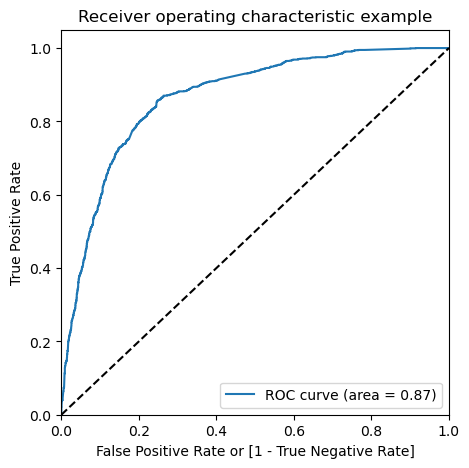

In [110]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## Finding the Optimal Cutoff

In [111]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.218776,6748,0,1,1,1,0,0,0,0,0,0,0
1,0,0.365600,7901,0,1,1,1,1,0,0,0,0,0,0
2,1,0.172154,6361,0,1,1,0,0,0,0,0,0,0,0
3,0,0.041104,2008,0,1,0,0,0,0,0,0,0,0,0
4,0,0.041104,1312,0,1,0,0,0,0,0,0,0,0,0


In [112]:
# Calculating the accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.355411  1.000000  0.000000
0.1   0.1  0.574707  0.973588  0.354773
0.2   0.2  0.737940  0.894351  0.651699
0.3   0.3  0.790352  0.830521  0.768204
0.4   0.4  0.804172  0.735143  0.842233
0.5   0.5  0.801043  0.650770  0.883900
0.6   0.6  0.782269  0.545121  0.913026
0.7   0.7  0.759322  0.432869  0.939320
0.8   0.8  0.727771  0.300073  0.963592
0.9   0.9  0.688136  0.143800  0.988269


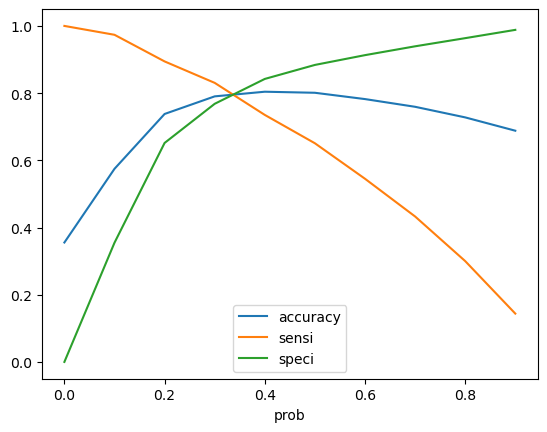

In [113]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [114]:
# 0.3 is the optimal cuttoff point to take as cutoff probability

In [115]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.218776,6748,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.365600,7901,0,1,1,1,1,0,0,0,0,0,0,1
2,1,0.172154,6361,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.041104,2008,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.041104,1312,0,1,0,0,0,0,0,0,0,0,0,0


In [116]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7903520208604954

In [117]:
# Creating a new confusion matrix based on 0.3 as cutoff
Confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
Confusion_2

array([[1899,  573],
       [ 231, 1132]], dtype=int64)

In [118]:
TP = Confusion_2[1,1] # true positive 
TN = Confusion_2[0,0] # true negatives
FP = Confusion_2[0,1] # false positives
FN = Confusion_2[1,0] # false negatives

In [119]:
# Sensitivity or Recall
TP / float(TP+FN)

0.8305209097578871

In [120]:
# Specificity
TN / float(TN+FP)

0.7682038834951457

In [121]:
# false postive rate
print(FP/ float(TN+FP))

0.23179611650485438


In [122]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6639296187683285


In [123]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8915492957746479


In [124]:
# Precision
print(TP/(TP+FP))

0.6639296187683285


## Making Predictions on Test Data Set

In [125]:
# Transforming the columns using Standard Scaler
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [126]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Finance Management
2534,0,1.227444,0,0,0,0,0,0,0,0,1,0,0
8417,0,-0.951076,0,0,1,0,0,0,0,1,0,0,1
3573,0,-0.839404,0,0,0,0,0,0,0,0,0,0,0
7985,0,-0.594091,0,0,0,0,0,0,0,0,0,0,1
612,0,-0.363424,0,0,0,0,0,0,0,0,0,0,0


In [127]:
# Predicting using our model and creting a data frame
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [128]:
# Converting predicted and actual values of y in a data frame
y_pred_1 = pd.DataFrame(y_test_pred) 
y_test_DF = pd.DataFrame(y_test)

In [129]:
# Creating a new column of customer ID
y_test_DF['Customer ID'] = y_test_DF.index

In [130]:
y_test_DF.reset_index(drop=True, inplace=True)
y_pred_1.reset_index(drop=True, inplace=True)

In [131]:
# Concating everything into a single data frame
Final_y_pred = pd.concat([y_test_DF,y_pred_1], axis=1)
Final_y_pred= Final_y_pred.rename(columns={ 0 : 'Conversion_Prob'})

In [132]:
Final_y_pred

,Converted,Customer ID,Conversion_Prob
0,1,2534,0.841306
1,0,8417,0.041104
2,0,3573,0.145179
3,0,7985,0.106525
4,0,612,0.227184
...,...,...,...
1639,1,2526,0.275492
1640,0,865,0.197907
1641,1,2617,0.799150
1642,1,4753,0.887502


In [133]:
# Making the final prediction using 0.3 as cutoff probability
Final_y_pred['final_predicted'] = Final_y_pred.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [142]:
# Assigning the lead Score between 0-100 for each lead
Final_y_pred['Lead Score']=Final_y_pred['Conversion_Prob'].apply(lambda x: round((x*100),2))

In [143]:
Final_y_pred

,Converted,Customer ID,Conversion_Prob,final_predicted,Lead Score
0,1,2534,0.841306,1,84.13
1,0,8417,0.041104,0,4.11
2,0,3573,0.145179,0,14.52
3,0,7985,0.106525,0,10.65
4,0,612,0.227184,0,22.72
...,...,...,...,...,...
1639,1,2526,0.275492,0,27.55
1640,0,865,0.197907,0,19.79
1641,1,2617,0.799150,1,79.92
1642,1,4753,0.887502,1,88.75


In [144]:
# Calculating the accuracy
metrics.accuracy_score(Final_y_pred.Converted, Final_y_pred.final_predicted)

0.7858880778588808

In [145]:
# Creating a confusion matrix
Confusion = metrics.confusion_matrix(Final_y_pred.Converted, Final_y_pred.final_predicted )

In [146]:
Confusion

array([[784, 250],
       [102, 508]], dtype=int64)

In [147]:
TP = Confusion[1,1] # true positive 
TN = Confusion[0,0] # true negatives
FP = Confusion[0,1] # false positives
FN = Confusion[1,0] # false negatives

In [148]:
#sensitivity or Recall
TP / float(TP+FN)

0.8327868852459016

In [149]:
#specificity
TN / float(TN+FP)

0.758220502901354

In [150]:
# Precision
print(TP/(TP+FP))

0.6701846965699209
